**Task 1:**
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
# import libraries

import pandas as pd
import numpy as np


Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# print shapes of training and test data. Check how the data looks


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# print the shape of one image

x_train[0].shape

(32, 32, 3)

### RGB Colour Model)

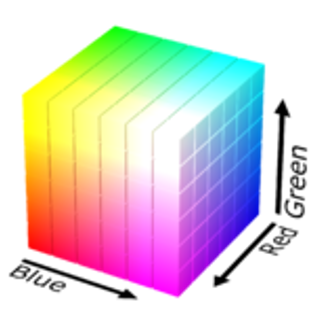

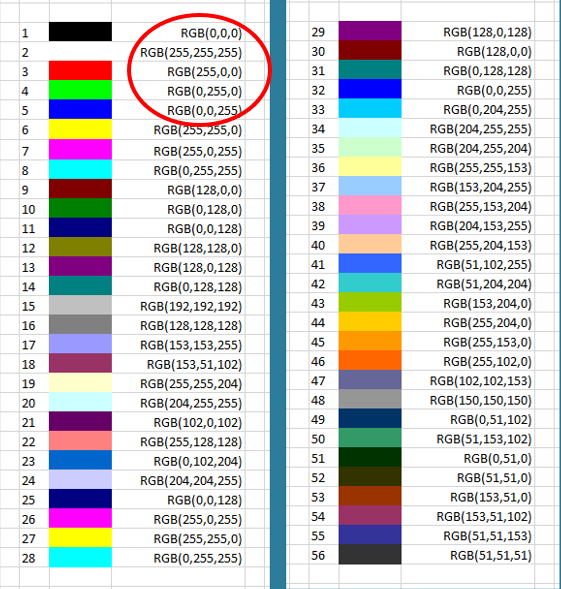

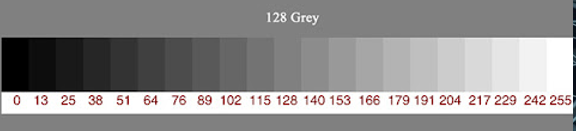

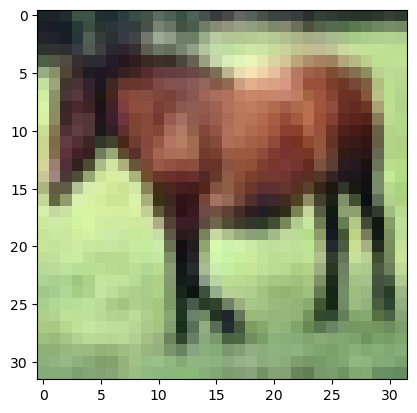

In [5]:
# show any sample image in the dataset. Use - plt.imshow()

import matplotlib.pyplot as plt


# HORSE
plt.imshow(x_train[7]);

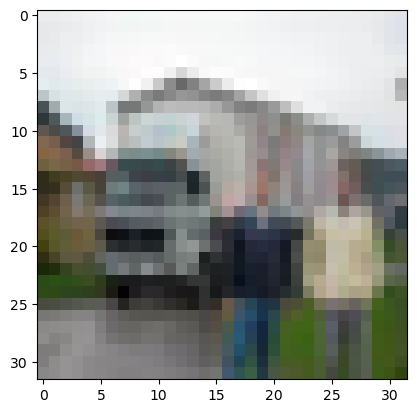

In [6]:
# Show any other image

# TRUCK
plt.imshow(x_train[16]);

In [7]:
# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

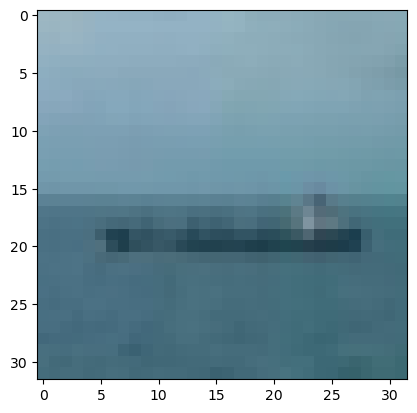

Picture number in the DataBase: 1323
Class number: [8]
Class name: ship


In [8]:
# Random Demo example from database

import random # random number generator

from PIL import Image


n = random.randint(0, x_test.shape[0])

# Image.fromarray - for drawing an image from CIFAR-10
plt.imshow(Image.fromarray(x_train[n]))
plt.show()

print("Picture number in the DataBase:", n)
print("Class number:", y_train[n])
print("Class name:", classes[y_train[n][0]])


# You can run this cell many times, and each timeyou will get a new picture


# PreProcessing

In [9]:
# print one image. Check how pixels look like. 

print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [10]:
# print shape of any image i.e particular value in the x_train

x_train[0].shape


(32, 32, 3)

In [11]:
# print the maximum value in x_train. Hint - Use .max()

x_train.max()

255

In [12]:
x_train = x_train/225
x_test  = x_test/255

In [13]:
# Print the shape of x_train again.

x_train.shape


(50000, 32, 32, 3)

In [14]:
# Print the shape of y_train again

y_train.shape

(50000, 1)

# One hot vector encoding.
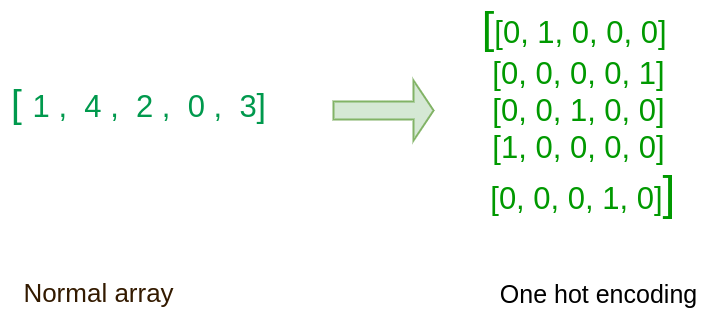


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [15]:
from tensorflow.keras.utils import to_categorical


In [16]:
# print shape of y_train

print(y_train.shape)


# Print shape of y_train [0]

print(y_train[0].shape)

(50000, 1)
(1,)


In [17]:
# code to use to_categorical to convert integers to numbers. 
# Assign the new array to the variable y_cat_train

y_cat_train = to_categorical(y_train,10)

In [18]:
# Print shape of the array y_cat_train

y_cat_train.shape

(50000, 10)

In [19]:
print(y_train[0])

# print any single value in the array y_cat_train

print(y_cat_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

y_cat_test = to_categorical(y_test,10)

In [21]:
# Print the shapes to look how y_cat_test looks.

print(y_cat_test.shape)

print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()


# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


# additional convolution and pooling layers with some choice of filters, strides, and activation function

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())


# Add few dense layers. 

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))




In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
#EarlyStopping?

In [28]:
# compile the models (model.compile). Use 'categorical cross entropy as the loss function'

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
# fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 

history = model.fit( x_train, y_cat_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,y_cat_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1,
                    
                # early stopping    
                    callbacks=[early_stop] )



Epoch 1/15


1563/1563 [==============================] - 17s 10ms/step - loss: 1.4659 - accuracy: 0.4779 - val_loss: 1.2273 - val_accuracy: 0.5593
Epoch 2/15
1563/1563 [==============================] - 16s 11ms/step - loss: 1.0865 - accuracy: 0.6240 - val_loss: 1.2760 - val_accuracy: 0.5650
Epoch 3/15
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9175 - accuracy: 0.6842 - val_loss: 1.0269 - val_accuracy: 0.6436
Epoch 4/15
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7915 - accuracy: 0.7271 - val_loss: 0.8988 - val_accuracy: 0.6917
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6917 - accuracy: 0.7620 - val_loss: 1.0598 - val_accuracy: 0.6673
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6161 - accuracy: 0.7900 - val_loss: 1.0047 - val_accuracy: 0.6723
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5444 - accuracy: 0.8165 - val_loss: 1.0375

### We can save the model in a file. Following code shows how to do this.

In [30]:
# Careful, don't overwrite file!

model.save('cifar_10epochs.h5')

C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### We can save the loss at every step. Following code shows how to do this. 

In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
# Print first few rows of losses.

losses.head(8)

,loss,accuracy,val_loss,val_accuracy
0,1.465935,0.47790,1.227334,0.5593
1,1.086481,0.62402,1.276007,0.5650
2,0.917485,0.68418,1.026867,0.6436
3,0.791452,0.72712,0.898819,0.6917
4,0.691675,0.76204,1.059777,0.6673
5,0.616077,0.79002,1.004745,0.6723
6,0.544368,0.81646,1.037503,0.6864


### Visualize a plot between accuracy vs val_accuracy for various steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy and 







<Axes: >

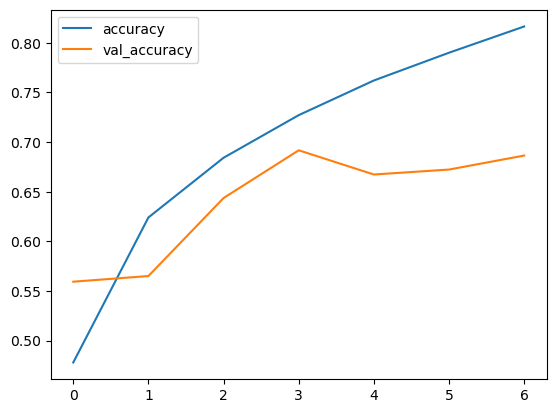

In [33]:
# plot accuracy and val_accuracy wrt the epochs

losses[['accuracy','val_accuracy']].plot()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1076\2543472966.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


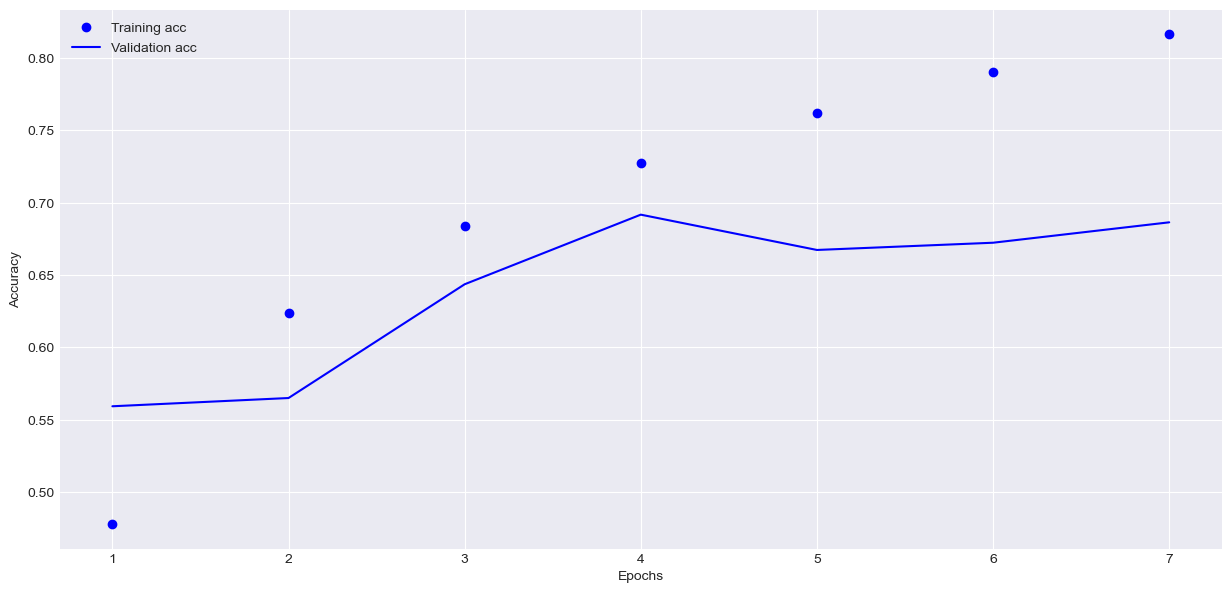

In [34]:
# printing Accuracy for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<Axes: >

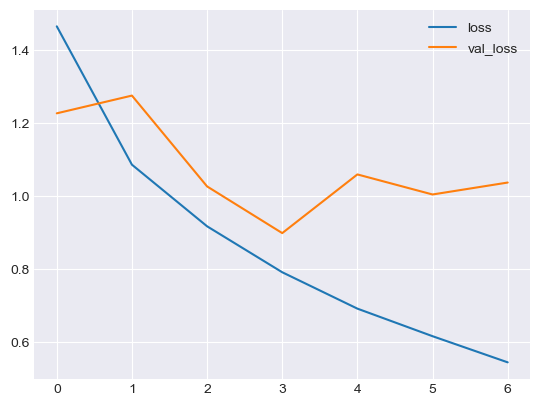

In [35]:
# plot loss and val_loss wrt the epochs

losses[['loss','val_loss']].plot()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1076\4006879425.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


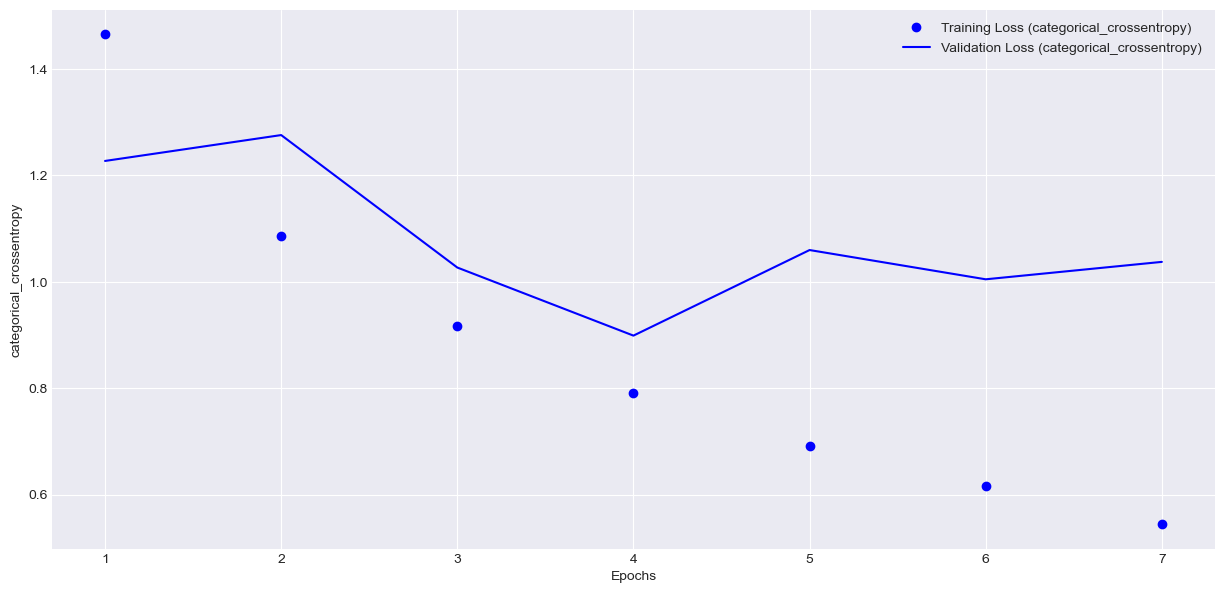

In [36]:
# printing Loss function (categorical_crossentropy) for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()

plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [37]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [38]:
model.evaluate(x_test,y_cat_test,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.0375 - accuracy: 0.6864


[1.0375028848648071, 0.6863999962806702]

### Make a prediction on test data set.   

In [39]:
# make predictions on the test dataset. 
# Store the prediction in variable 'predicrion'. Hint - Use model.predict()

#prediction = model.predict(x_test)
prediction = np.argmax(model.predict(x_test), axis = -1)

313/313 [==============================] - 1s 4ms/step


In [40]:
prediction

array([9, 0, 0, ..., 5, 4, 7], dtype=int64)

In [41]:
prediction.shape

(10000,)

In [42]:
#np.argmax?

### We could get the full classification report. Following code does that.

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1000
           1       0.88      0.76      0.81      1000
           2       0.70      0.46      0.55      1000
           3       0.44      0.61      0.51      1000
           4       0.61      0.70      0.65      1000
           5       0.61      0.55      0.58      1000
           6       0.82      0.69      0.75      1000
           7       0.78      0.72      0.75      1000
           8       0.80      0.76      0.78      1000
           9       0.75      0.82      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



### We could also get and plot confusion matrix. Follwoing code does that. 

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)

array([[812,   9,  30,  28,  22,   7,   7,   8,  47,  30],
       [ 43, 755,   8,  12,   5,   8,  10,   4,  28, 127],
       [113,   5, 456, 110, 117,  66,  58,  47,  16,  12],
       [ 32,   6,  34, 611,  83, 132,  35,  31,  17,  19],
       [ 40,   2,  30, 106, 700,  29,  21,  53,  13,   6],
       [ 22,   2,  35, 272,  56, 545,  12,  41,   5,  10],
       [ 16,   2,  26, 126,  74,  31, 692,  10,  13,  10],
       [ 31,   2,  18,  70,  75,  54,   5, 716,   7,  22],
       [132,  22,   9,  21,   9,   8,   6,   3, 757,  33],
       [ 41,  49,   8,  24,   3,   9,   2,   6,  38, 820]], dtype=int64)

<Axes: >

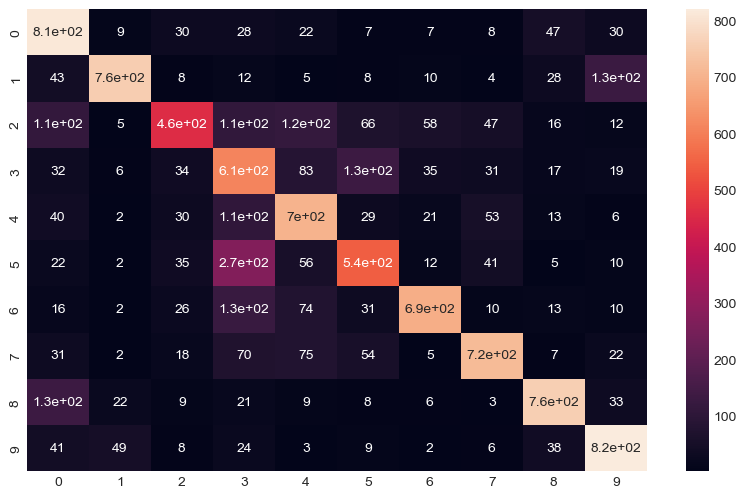

In [45]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

# https://github.com/matplotlib/matplotlib/issues/14751

# Following code makes a prediction on specific image.

In [46]:
my_image = x_test[16]

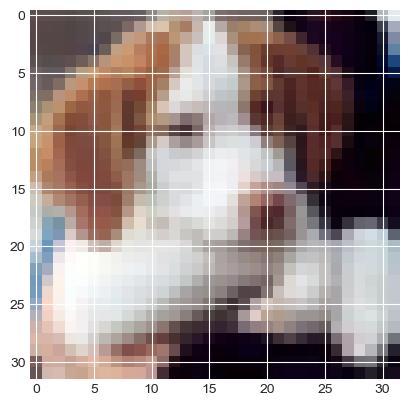

In [47]:
plt.imshow(my_image);

In [48]:
# SHAPE --> (num_images,width,height,color_channels)

#model.predict_classes(my_image.reshape(1,32,32,3))

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 23ms/step


array([5], dtype=int64)

In [49]:
# 5 is DOG

1/1 [==============================] - 0s 16ms/step


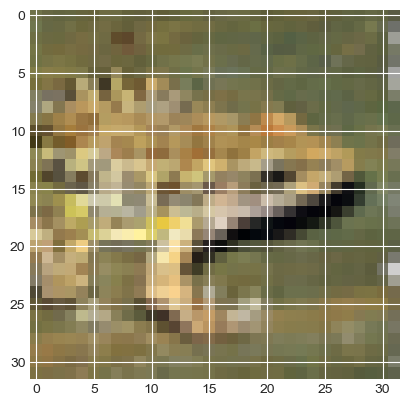

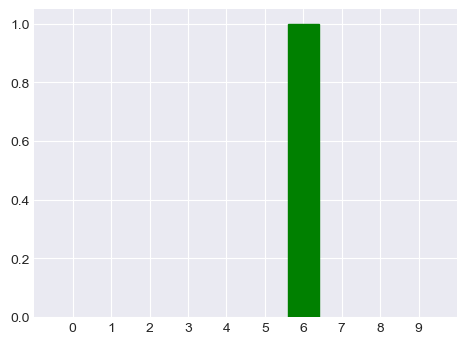

The predicted answer: frog 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [50]:
# image recognition demonstration
# neural network operation

from tensorflow.keras.preprocessing.image import array_to_img

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

**Task 2:**

Evaluate your model for different optimizers available in the Keras. 

- Store the optimizers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimizer


In [51]:
# Create a list containing the names of optimizers.
# Create an empty list to store scores

# For every optimizer
   # compile your model
   # fit your model
   # find score and append the score in a list

# Plot score vs optimize 

In [52]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta']
scores = []

In [53]:
for row in optimizers:
  model.compile(loss='categorical_crossentropy', optimizer= row, metrics=['accuracy'])
  model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])
  scores.append(model.evaluate(x_test,y_cat_test,verbose=0))

Epoch 1/3
1563/1563 [==============================] - 20s 12ms/step - loss: 0.4070 - accuracy: 0.8652 - val_loss: 1.2037 - val_accuracy: 0.6955
Epoch 2/3
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3130 - accuracy: 0.8946 - val_loss: 1.1387 - val_accuracy: 0.6901
Epoch 3/3
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2746 - accuracy: 0.9091 - val_loss: 1.1154 - val_accuracy: 0.6980
Epoch 1/3
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4627 - accuracy: 0.8482 - val_loss: 1.4335 - val_accuracy: 0.6849
Epoch 2/3
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4231 - accuracy: 0.8602 - val_loss: 1.2058 - val_accuracy: 0.6681
Epoch 3/3
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3837 - accuracy: 0.8753 - val_loss: 1.5678 - val_accuracy: 0.6737
Epoch 1/3
1563/1563 [==============================] - 30s 18ms/step - loss: 0.3337 - accuracy: 0.8884 - val_loss: 1.2839 - val_ac

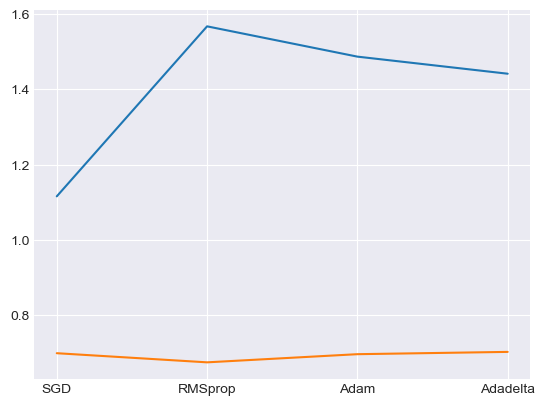

In [54]:
plt.plot (optimizers, scores);

In [55]:
print(scores)

[[1.115443468093872, 0.6980000138282776], [1.5678317546844482, 0.6736999750137329], [1.4872210025787354, 0.6953999996185303], [1.441752552986145, 0.7014999985694885]]
